The main gol with Explory Data Analysis (EDA) is to answer the following question: 

What are the characteristics the have the most impact on the predicted variable?

To that, we're going through some methods:

* Descriptive Analysis
* GroupBy
* ANOVA
* Correlation
* Correlation - Statistics



### Descriptive Statistics

In [58]:
import pandas as pd

df = pd.DataFrame({"A": [1,2,3,4,1],
                   "B": [10.2,12.2,13.1,10,20],
                   "C": [8,7,5,8,9],
                   "D": ["rafael","kirchhoff","rafael","nicki","kirchhoff"]})

df

,A,B,C,D
0,1,10.2,8,rafael
1,2,12.2,7,kirchhoff
2,3,13.1,5,rafael
3,4,10.0,8,nicki
4,1,20.0,9,kirchhoff


In [8]:
#the describe functions. As we can see, it doesn't show the statistics related to categorial data
df.describe()

,A,B,C
count,5.00000,5.000000,5.000000
mean,2.20000,13.100000,7.400000
std,1.30384,4.075537,1.516575
min,1.00000,10.000000,5.000000
25%,1.00000,10.200000,7.000000
50%,2.00000,12.200000,8.000000
75%,3.00000,13.100000,8.000000
max,4.00000,20.000000,9.000000


In [9]:
#the count function counts the number of elements in each column
df.count()

A    5
B    5
C    5
D    5
dtype: int64

In [10]:
#value_counts is useful to make histograms of categorical data, as it returns the frequency of each value in the dataframe. 
names_counts = df["D"].value_counts()
names_counts

rafael       2
kirchhoff    2
nicki        1
Name: D, dtype: int64

In [42]:
#Box Plots

#Box plots make it easy to compare between groups. 

import seaborn as sns

dataset_url = 'http://bit.ly/2cLzoxH'

gapminder = pd.read_csv(dataset_url)

gapminder.head(3)



,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


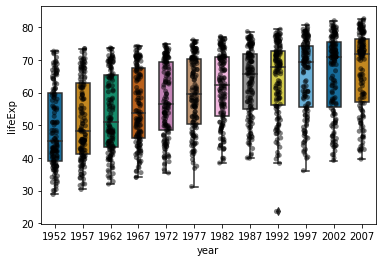

In [44]:
# Here, we're plotting the life expectancy in function of the year. 
sns.boxplot(y = 'lifeExp', x = 'year', data = gapminder, width = 0.5, palette = 'colorblind')
sns.stripplot(y = 'lifeExp', x = 'year', data = gapminder, jitter = True, marker = 'o', alpha = 0.5, color = 'black')

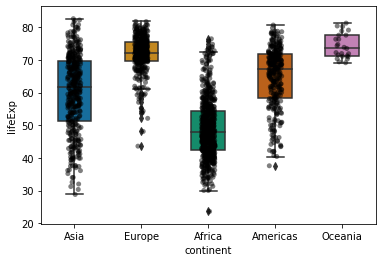

In [48]:
#Here, we're plotting the life expectancy in function of the continent.:

sns.boxplot(x = 'continent', y = 'lifeExp', data = gapminder, width = 0.5, palette = 'colorblind')
sns.stripplot( x = 'continent', y = 'lifeExp', data = gapminder, jitter = True, marker = 'o', alpha = 0.5, color = 'black')


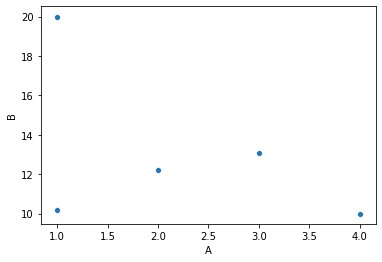

In [60]:
#Using scatterplot, we usually the predictor variable (independent variable) on x axis and the target on y axis:

sns.scatterplot(x = "A", y = "B", data = df)

### Grouping data: GroupBy Method

Assume you want to know: Is there any relationship between the different types of “drive system”
(forward, rear and four-wheel drive) and the “price” of the vehicles?
If so, which type of “drive system” adds the most value to a vehicle?
It would be nice if we could group all the data by the different types of drive wheels,
and compare the results of these different drive wheels against each other.
In pandas this can be done using the group by method.

In [67]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot', 'Falcon', 'Falcon', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.,375.,372., 24.]})

df


,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0
4,Falcon,375.0
5,Falcon,372.0
6,Parrot,24.0


In [69]:
#Here, we're able to see the influence of each different animal species on the speed
df.groupby(['Animal']).mean()


,Max Speed
Animal,
Falcon,374.250000
Parrot,24.666667


In [73]:
# The pivot method return reshaped DataFrame organized by given index / column values.


df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [74]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [75]:
df.pivot(index='bar', columns='foo', values='baz')

foo,one,two
bar,,
A,1,4
B,2,5
C,3,6


#### Heatmaps: visualizing frequency 

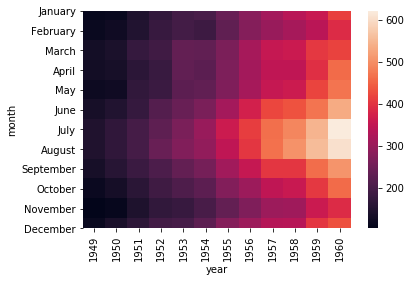

In [78]:
#
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

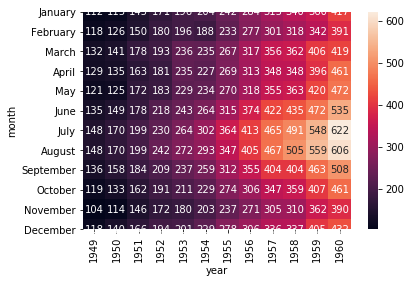

In [79]:
ax = sns.heatmap(flights, annot=True, fmt="d")